# Homework 3 Question 6 - Figure 3b

Reproduce one of the images in Figure 3. 

Time series of daily SSTs and winds, smoothed with a 30 day running mean

* **light grey** indicates the envelope of maximum and minimum values during 2002–2013

* **dark grey** indicates the envelope of ±1 SD around the mean during 2002–2013

* **black line** indicate the mean during 2002–2013 

* **blue, red, and green lines** indicate the values during 2014, 2015, and 2016, respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xarray as xr

xr.set_options(display_style="html")  # display dataset nicely

import warnings

warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [2]:
# Load data
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [3]:
# The latitude of Newport, OR, USA is 44.636784, and the longitude is -124.053452. 
lat_newport = 44.636784
lon_newport = -124.053452
newport_ds = ds.analysed_sst.sel(lat=lat_newport, lon=lon_newport, method='nearest')

# Kelvin to Celsius Conversion
newport_ds = newport_ds - 273.15

# smoothed with a 30 day running mean
newport_ds = newport_ds.rolling(time=30, center=True).mean()

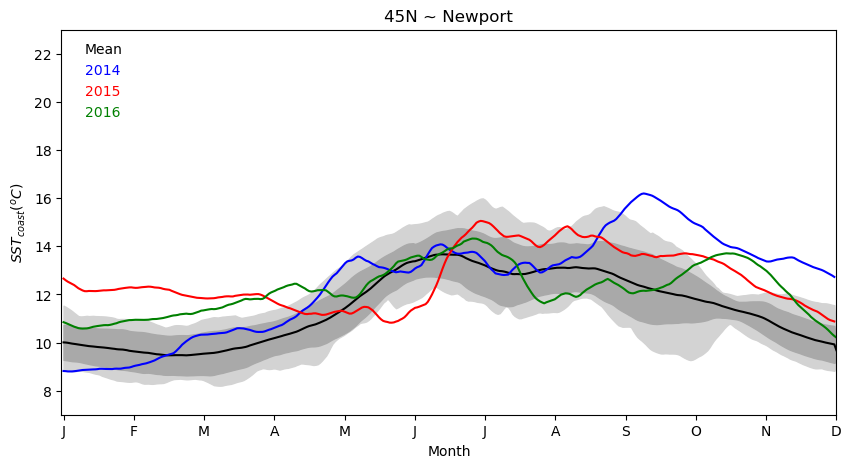

In [7]:
# light grey:  maximum and minimum values during 2002–2013
max_values = newport_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').max()
min_values = newport_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').min()

# dark grey:  ±1 SD around the mean during 2002–2013
mean_values = newport_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').mean()
std_values = newport_ds.sel(time=slice('2002', '2013')).groupby('time.dayofyear').std()
upper_values = mean_values + std_values
lower_values = mean_values - std_values

fig, ax = plt.subplots(figsize=(10,5))

# light grey:  maximum and minimum values during 2002–2013
ax.fill_between(max_values.dayofyear, max_values, min_values, color='lightgrey')

# dark grey:  ±1 SD around the mean during 2002–2013
ax.fill_between(mean_values.dayofyear, upper_values, lower_values, color='darkgrey')

# black line: the mean during 2002–2013
ax.plot(mean_values.dayofyear, mean_values, color='black', label='Mean')

#blue line: indicate the values during 2014
newport_ds.sel(time='2014').groupby('time.dayofyear').mean().plot(color='blue', label='2014')

#red line: indicate the values during 2015
newport_ds.sel(time='2015').groupby('time.dayofyear').mean().plot(color='red', label='2015')

#green line: indicate the values during 2016
newport_ds.sel(time='2016').groupby('time.dayofyear').mean().plot(color='green', label='2016')

# modify x/y labels
ax.set_title('45N ~ Newport')
ax.set_xlabel('Month')
ax.set_ylabel('$SST_{coast}(^{o}C)$')

# modify x-ticks
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
ax.set_xticks(ticks=np.linspace(1, 366, 12), labels=month)

# modify the x/y limits
ax.set_xlim(0, 366)
ax.set_ylim(7,23)

plt.legend(loc='upper left', labelcolor='linecolor', frameon=False, handlelength=0)
plt.savefig('outputs/Q06.png');